In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [91]:
df= pd.read_csv('/Users/admin/code/ahmedhassan230/project_h4y/raw_data/Mental Health Dataset 2.csv')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [93]:
df

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


In [94]:
from sklearn.preprocessing import LabelEncoder
list_col=['Gender', 'Occupation', 'self_employed', 'Days_Indoors', 'Country', 'Growing_Stress', 'Social_Weakness', 'Mood_Swings']
labelencoder = LabelEncoder()
for col in list_col:
    df[col]=labelencoder.fit_transform(df[col])

In [95]:
# Dropping the column 'Growing_Stress'
X = df[['Gender', 'Occupation', 'self_employed', 'Days_Indoors', 'Country', 'Social_Weakness', 'Mood_Swings']]

# Define the target variable
y = df['Growing_Stress']

In [96]:
X

,Gender,Occupation,self_employed,Days_Indoors,Country,Social_Weakness,Mood_Swings
0,0,1,2,0,34,2,2
1,0,1,2,0,34,2,2
2,0,1,2,0,34,2,2
3,0,1,0,0,34,2,2
4,0,1,0,0,34,2,2
...,...,...,...,...,...,...,...
292359,1,0,1,1,34,0,1
292360,1,0,0,1,29,0,1
292361,1,0,0,1,34,0,1
292362,1,0,0,1,34,0,1


In [97]:
y

0         2
1         2
2         2
3         2
4         2
         ..
292359    1
292360    1
292361    1
292362    1
292363    1
Name: Growing_Stress, Length: 292364, dtype: int64

In [98]:
y.unique()

array([2, 1, 0])

In [125]:
df= pd.concat([X,y], ignore_index=True, axis=1)
df.he

,0,1,2,3,4,5,6,7
0,0,1,2,0,34,2,2,2
1,0,1,2,0,34,2,2,2
2,0,1,2,0,34,2,2,2
3,0,1,0,0,34,2,2,2
4,0,1,0,0,34,2,2,2
...,...,...,...,...,...,...,...,...
495,0,4,0,0,34,2,0,2
496,0,4,0,0,34,2,0,2
497,0,4,0,0,4,2,0,2
498,0,4,0,0,34,2,0,2


In [128]:
df.iloc[:,:2]

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
292359,1,0
292360,1,0
292361,1,0
292362,1,0


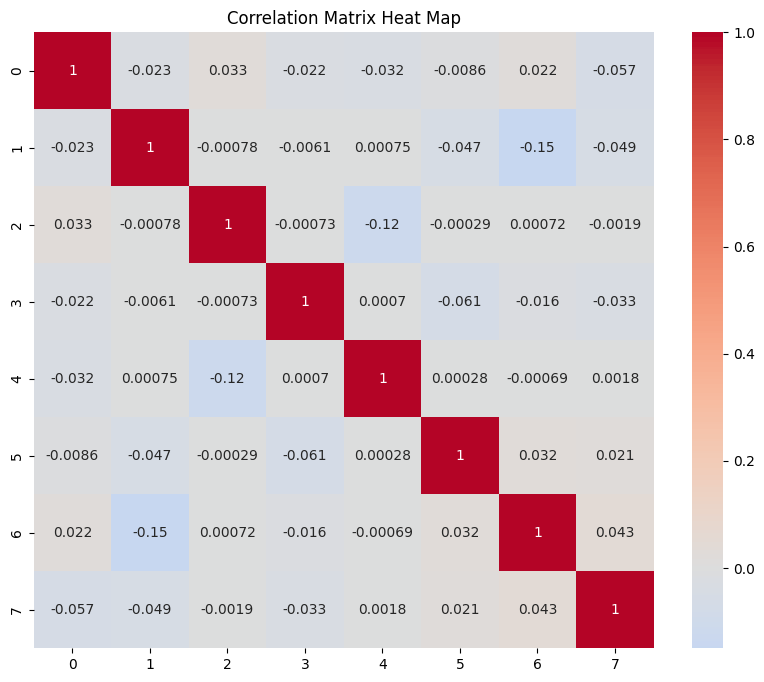

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()

# Step 3: Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heat Map')
plt.show()

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
# Create and train the logistic regression model
model = KNeighborsClassifier(n_neighbors=50)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [116]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6726028959069661

In [83]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.4300
Precision: 0.4315
Recall: 0.4300
F1 Score: 0.4283
